#Chronic Kidney Disease

# Objective: To implement various classification models and ensemble them to classify Chronic Kidney Disease as infected or not

## Dataset
The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease.

## Attributes
1.	Age(numerical)
age in years
2.	Blood Pressure(numerical)
bp in mm/Hg
3.	Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)
4.	Albumin(nominal)
al - (0,1,2,3,4,5)
5.	Sugar(nominal)
su - (0,1,2,3,4,5)
6.	Red Blood Cells(nominal)
rbc - (normal,abnormal)
7.	Pus Cell (nominal)
pc - (normal,abnormal)
8.	Pus Cell clumps(nominal)
pcc - (present,notpresent)
9.	Bacteria(nominal)
ba - (present,notpresent)
10.	Blood Glucose Random(numerical)
bgr in mgs/dl
11.	Blood Urea(numerical)
bu in mgs/dl
12.	Serum Creatinine(numerical)
sc in mgs/dl
13.	Sodium(numerical)
sod in mEq/L
14.	Potassium(numerical)
pot in mEq/L
15.	Hemoglobin(numerical)
hemo in gms
16.	Packed Cell Volume(numerical)
17.	White Blood Cell Count(numerical)
wc in cells/cumm
18.	Red Blood Cell Count(numerical)
rc in millions/cmm
19.	Hypertension(nominal)
htn - (yes,no)
20.	Diabetes Mellitus(nominal)
dm - (yes,no)
21.	Coronary Artery Disease(nominal)
cad - (yes,no)
22.	Appetite(nominal)
appet - (good,poor)
23.	Pedal Edema(nominal)
pe - (yes,no)
24.	Anemia(nominal)
ane - (yes,no)

## Target Class
Class (nominal)
class - (ckd,notckd)

## Source: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Tasks:
1.	Obtain the dataset
2.	Apply pre-processing techniques (if any)
3.	Divide dataset into training and testing set, respectively.
4.	Implement SVM, Logistic regression, Decision tree and KNN models.
5.	Ensemble SVM, Logistic regression, Decision tree and KNN models. 
6.	Evaluate accuracy, precision, recall and f-measure for all models.
7.	Plot the results by playing with the hyper-parameters of the afore-mentioned models.
8.	Conclude the results


Helpful links: 

https://scikit-learn.org/stable/modules/ensemble.html

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

https://scikit-learn.org/stable/modules/ensemble.html

https://www.datacamp.com/community/tutorials/ensemble-learning-python







## Task 1: Implement classification models on Chronic Kidney Disease dataset 

In [89]:
# Load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt

In [28]:
# Load the dataset 
data = pd.read_csv('kidney_disease.csv')
data.head(30)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [30]:
data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [31]:
data['classification'].replace('ckd\t','ckd',inplace=True)

In [32]:
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [33]:
# Shuffel the dataset
data = data.sample(frac=1).reset_index(drop=True)

In [34]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [35]:
# Imputing Missing Values
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [36]:
X = pd.DataFrame(data)
data = DataFrameImputer().fit_transform(X)

In [37]:
data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [38]:
LE = LabelEncoder()
CateList = data.select_dtypes(exclude="int64").columns
print(CateList)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [42]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [43]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,239,26,5,2,3,0,1,1,0,0,31,36,12,21,14,55,27,90,34,0,3,1,0,0,0,0
1,329,25,1,5,0,0,1,1,0,0,7,12,5,31,8,78,36,72,33,0,3,1,0,0,0,1
2,290,47,2,4,0,0,1,1,0,0,4,15,2,31,8,85,40,78,41,0,3,1,0,0,0,1
3,148,62,1,3,2,1,1,1,0,0,82,13,83,22,20,62,40,90,34,1,3,1,1,0,0,0
4,263,37,4,4,0,0,1,1,0,0,44,32,8,21,24,99,33,80,34,0,3,1,0,0,0,1


In [44]:
LE.classes_

array([0, 1])

In [46]:
df = data.iloc[:,:-1]
mm = MinMaxScaler()
df[:]= mm.fit_transform(df[:])

In [47]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.598997,0.342105,0.5,0.4,0.500000,0.000000,1.0,1.0,0.0,0.0,0.212329,0.305085,0.142857,0.617647,0.35,0.478261,0.627907,0.989011,0.708333,0.0,0.75,0.5,0.0,0.0,0.0
1,0.824561,0.328947,0.1,1.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.047945,0.101695,0.059524,0.911765,0.20,0.678261,0.837209,0.791209,0.687500,0.0,0.75,0.5,0.0,0.0,0.0
2,0.726817,0.618421,0.2,0.8,0.000000,0.000000,1.0,1.0,0.0,0.0,0.027397,0.127119,0.023810,0.911765,0.20,0.739130,0.930233,0.857143,0.854167,0.0,0.75,0.5,0.0,0.0,0.0
3,0.370927,0.815789,0.1,0.6,0.333333,0.166667,1.0,1.0,0.0,0.0,0.561644,0.110169,0.988095,0.647059,0.50,0.539130,0.930233,0.989011,0.708333,1.0,0.75,0.5,1.0,0.0,0.0
4,0.659148,0.486842,0.4,0.8,0.000000,0.000000,1.0,1.0,0.0,0.0,0.301370,0.271186,0.095238,0.617647,0.60,0.860870,0.767442,0.879121,0.708333,0.0,0.75,0.5,0.0,0.0,0.0


In [49]:
# Divide the dataset to training and testing set
X = df.values
y = data['classification'].values
print(X.shape, y.shape)

(400, 25) (400,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(300, 25) (300,)
(100, 25) (100,)


In [55]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [56]:
# Implement various classification models such as SVM, Logistic regression, Decision tree and KNN, respectively.
# Note all models can be obtained from sklearn 
clf1 = SVC(kernel='linear') 
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier(criterion="gini")
clf4 = KNeighborsClassifier(n_neighbors=3)

In [58]:
# Train and test the models
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [60]:
pred1_t1 = clf1.predict(X_train)
pred1_t2 = clf1.predict(X_test)
pred2_t1 = clf2.predict(X_train)
pred2_t2 = clf2.predict(X_test)
pred3_t1 = clf3.predict(X_train)
pred3_t2 = clf3.predict(X_test)
pred4_t1 = clf4.predict(X_train)
pred4_t2 = clf4.predict(X_test)

In [61]:
acc1_t1 = accuracy_score(y_train, pred1_t1)
acc1_t2 = accuracy_score(y_test, pred1_t2)
acc2_t1 = accuracy_score(y_train, pred2_t1)
acc2_t2 = accuracy_score(y_test, pred2_t2)
acc3_t1 = accuracy_score(y_train, pred3_t1)
acc3_t2 = accuracy_score(y_test, pred3_t2)
acc4_t1 = accuracy_score(y_train, pred4_t1)
acc4_t2 = accuracy_score(y_test, pred4_t2)

In [62]:
print("Training Accuracy (SVM):",acc1_t1)
print("Testing Accuracy (SVM):",acc1_t2)
print("Training Accuracy (Logistic Regression):",acc2_t1)
print("Testing Accuracy (Logistic Regression):",acc2_t2)
print("Training Accuracy (Decision Tree):",acc3_t1)
print("Testing Accuracy (Decision Tree):",acc3_t2)
print("Training Accuracy (KNN):",acc4_t1)
print("Testing Accuracy (KNN):",acc4_t2)

Training Accuracy (SVM): 1.0
Testing Accuracy (SVM): 0.99
Training Accuracy (Logistic Regression): 0.9966666666666667
Testing Accuracy (Logistic Regression): 0.98
Training Accuracy (Decision Tree): 1.0
Testing Accuracy (Decision Tree): 1.0
Training Accuracy (KNN): 0.9966666666666667
Testing Accuracy (KNN): 0.96


## Task 2: Ensembling of classificatino models

In [64]:
# Obtain the results of various models from Task 1
estimators = []
estimators.append(('SVM', clf1))
estimators.append(('Logistic Regression', clf2))
estimators.append(('Decision Tree', clf3))
estimators.append(('KNN', clf4))
estimators

[('SVM',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('Decision Tree',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_

In [66]:
from sklearn.ensemble import VotingClassifier

In [69]:
# Apply ensembling of various classification models such as SVM, Logistic regression, Decision tree and KNN
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_interc...
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
         

In [70]:
pred_t1 = ensemble.predict(X_train)
pred_t2 = ensemble.predict(X_test)

In [71]:
acc_t1 = accuracy_score(y_train, pred_t1)
acc_t2 = accuracy_score(y_test, pred_t2)

In [72]:
print("Training Accuracy (Ensemble):",acc_t1)
print("Testing Accuracy (Ensemble):",acc_t2)

Training Accuracy (Ensemble): 1.0
Testing Accuracy (Ensemble): 0.99


In [99]:
# Build training analysis graphs for various parameters i.e., accuracy, precision, recall and f-measure for all models.  
precision1, recall1, fscore1, _ = precision_recall_fscore_support(y_train, pred1_t1, average='weighted')
precision2, recall2, fscore2, _ = precision_recall_fscore_support(y_train, pred2_t1, average='weighted')
precision3, recall3, fscore3, _ = precision_recall_fscore_support(y_train, pred3_t1, average='weighted')
precision4, recall4, fscore4, _ = precision_recall_fscore_support(y_train, pred4_t1, average='weighted')

In [100]:
print('Training Analysis - \n')
Model = ['SVM','Logistic Regression','Decision Tree','KNN']
for i in range(4):
    print(Model[i]+" Precision: "+str(vars()['precision' + str(i+1)]))
    print(Model[i]+" Recall: "+str(vars()['recall' + str(i+1)]))
    print(Model[i]+" F-Score: "+str(vars()['fscore' + str(i+1)]))
    print()

Training Analysis - 

SVM Precision: 1.0
SVM Recall: 1.0
SVM F-Score: 1.0

Logistic Regression Precision: 0.9966978193146417
Logistic Regression Recall: 0.9966666666666667
Logistic Regression F-Score: 0.9966701847605877

Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F-Score: 1.0

KNN Precision: 0.9966978193146417
KNN Recall: 0.9966666666666667
KNN F-Score: 0.9966701847605877



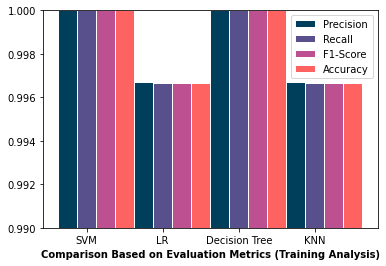

In [110]:
barWidth = 0.25

bars1 = [precision1, precision2, precision3, precision4]
bars2 = [recall1, recall2, recall3, recall4]
bars3 = [fscore1, fscore2, fscore3, fscore4]
bars4 = [acc1_t1, acc2_t1, acc3_t1, acc4_t1]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#003f5c', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#58508d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#bc5090', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#ff6361', width=barWidth, edgecolor='white', label='Accuracy')

plt.xlabel('Comparison Based on Evaluation Metrics (Training Analysis)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SVM', 'LR', 'Decision Tree', 'KNN'])
plt.ylim((0.99, 1)) 
plt.legend()
plt.show()

In [111]:
# Build testing analysis graphs for various parameters i.e., accuracy, precision, recall and f-measure for all models.  
precision1, recall1, fscore1, _ = precision_recall_fscore_support(y_test, pred1_t2, average='weighted')
precision2, recall2, fscore2, _ = precision_recall_fscore_support(y_test, pred2_t2, average='weighted')
precision3, recall3, fscore3, _ = precision_recall_fscore_support(y_test, pred3_t2, average='weighted')
precision4, recall4, fscore4, _ = precision_recall_fscore_support(y_test, pred4_t2, average='weighted')

In [112]:
print('Testing Analysis - \n')
Model = ['SVM','Logistic Regression','Decision Tree','KNN']
for i in range(4):
    print(Model[i]+" Precision: "+str(vars()['precision' + str(i+1)]))
    print(Model[i]+" Recall: "+str(vars()['recall' + str(i+1)]))
    print(Model[i]+" F-Score: "+str(vars()['fscore' + str(i+1)]))
    print()

Testing Analysis - 

SVM Precision: 0.9902222222222221
SVM Recall: 0.99
SVM F-Score: 0.9900111347302358

Logistic Regression Precision: 0.9808695652173912
Logistic Regression Recall: 0.98
Logistic Regression F-Score: 0.980040404040404

Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F-Score: 1.0

KNN Precision: 0.9633333333333333
KNN Recall: 0.96
KNN F-Score: 0.9601288244766506



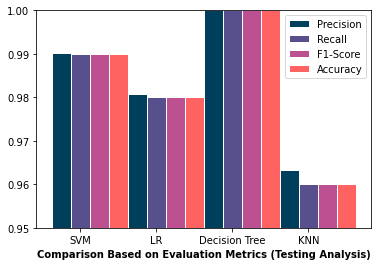

In [113]:
barWidth = 0.25

bars1 = [precision1, precision2, precision3, precision4]
bars2 = [recall1, recall2, recall3, recall4]
bars3 = [fscore1, fscore2, fscore3, fscore4]
bars4 = [acc1_t2, acc2_t2, acc3_t2, acc4_t2]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#003f5c', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#58508d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#bc5090', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#ff6361', width=barWidth, edgecolor='white', label='Accuracy')

plt.xlabel('Comparison Based on Evaluation Metrics (Testing Analysis)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SVM', 'LR', 'Decision Tree', 'KNN'])
plt.ylim((0.95, 1)) 
plt.legend()
plt.show()

In [114]:
precision1, recall1, fscore1, _ = precision_recall_fscore_support(y_train, pred_t1, average='weighted')
precision2, recall2, fscore2, _ = precision_recall_fscore_support(y_test, pred_t2, average='weighted')

In [115]:
print('Ensemble Model Analysis - \n')
Model = ['Training','Testing']
for i in range(2):
    print(Model[i]+" Precision: "+str(vars()['precision' + str(i+1)]))
    print(Model[i]+" Recall: "+str(vars()['recall' + str(i+1)]))
    print(Model[i]+" F-Score: "+str(vars()['fscore' + str(i+1)]))
    print()

Ensemble Model Analysis - 

Training Precision: 1.0
Training Recall: 1.0
Training F-Score: 1.0

Testing Precision: 0.9902222222222221
Testing Recall: 0.99
Testing F-Score: 0.9900111347302358



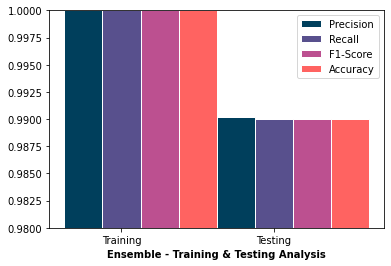

In [119]:
barWidth = 0.25

bars1 = [precision1, precision2]
bars2 = [recall1, recall2]
bars3 = [fscore1, fscore2]
bars4 = [acc_t1, acc_t2]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#003f5c', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#58508d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#bc5090', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#ff6361', width=barWidth, edgecolor='white', label='Accuracy')

plt.xlabel('Ensemble - Training & Testing Analysis', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Training', 'Testing'])
plt.ylim((0.98, 1)) 
plt.legend()
plt.show()

# Conclude the results

We can see that, on an average, the Ensemble model (combination of clf1, clf2, clf3 and clf4) performs better than any other model used on an individual basis (SVM, Logistic Regression, Decision Tree, KNN) in terms of all the classification metrics - Accuracy, Precision, Recall, F-Score.